# Bike Count Dataset

Prediction of hourly bike rental count based on environmental and seasonal settings 

Columns: 
seasons : season(1= spring, 2 = summer, 3= fall, 4 = winter)
weather : 1 = clear, 2= mist/cloudy, 3 = light snow, 4 = heavy rain
yr : year (0= 2011, 1 = 2012)
mnth: month (1 to 12) 
hr : hour (0 to 23) 
Temp : Temp in Celsius, 41 max
aTemp : feeling temp in Celsius, 50 max
windspeed: 67 max
casual: count of casual users 
registered: count of registered users 
cnt: total count o bike rentals both casual and registered users

# Import libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy 
import statsmodels
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

# Load Dataset

In [5]:
Bikes = pd.read_csv('/Users/briellewoodson/Documents/Final Project/hour.csv')

In [6]:
Bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Wrangling/Analysis

In [1]:
#Descripitive Stats

In [7]:
Bikes.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [10]:
Bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
Bikes.drop(['dteday'], axis=1, inplace=True)

In [8]:
Bikes.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
Bikes.mean()

instant       8690.000000
season           2.501640
yr               0.502561
mnth             6.537775
hr              11.546752
holiday          0.028770
weekday          3.003683
workingday       0.682721
weathersit       1.425283
temp             0.496987
atemp            0.475775
hum              0.627229
windspeed        0.190098
casual          35.676218
registered     153.786869
cnt            189.463088
dtype: float64

In [20]:
Bikes.median()

instant       8690.0000
season           3.0000
yr               1.0000
mnth             7.0000
hr              12.0000
holiday          0.0000
weekday          3.0000
workingday       1.0000
weathersit       1.0000
temp             0.5000
atemp            0.4848
hum              0.6300
windspeed        0.1940
casual          17.0000
registered     115.0000
cnt            142.0000
dtype: float64

# Check Distribution

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

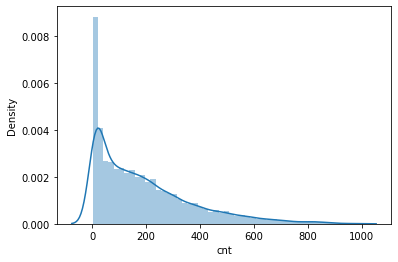

In [15]:
sns.distplot(Bikes['cnt'])

In [ ]:
#Data is distributed and skewed to the left.

<AxesSubplot:>

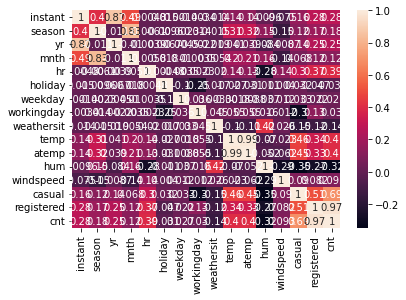

In [16]:
sns.heatmap(Bikes.corr(), annot=True)